<a href="https://colab.research.google.com/github/GabrielOliNoDev/BIG-DATA-INTELIGENCIA-ARTIFICIAL---Colab-Python/blob/main/REAMOSTRAGEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import ( train_test_split, StratifiedKFold,
cross_val_score )
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X, y = make_classification(
  n_samples=3000,
  n_features=12,
  n_informative=4,
  n_redundant=4,
  n_repeated=0,
  n_classes=2,
  n_clusters_per_class=2,
  class_sep=0.6, # menor separação => mais difícil
  flip_y=0.07, # ruído de rótulos
  random_state=42
)

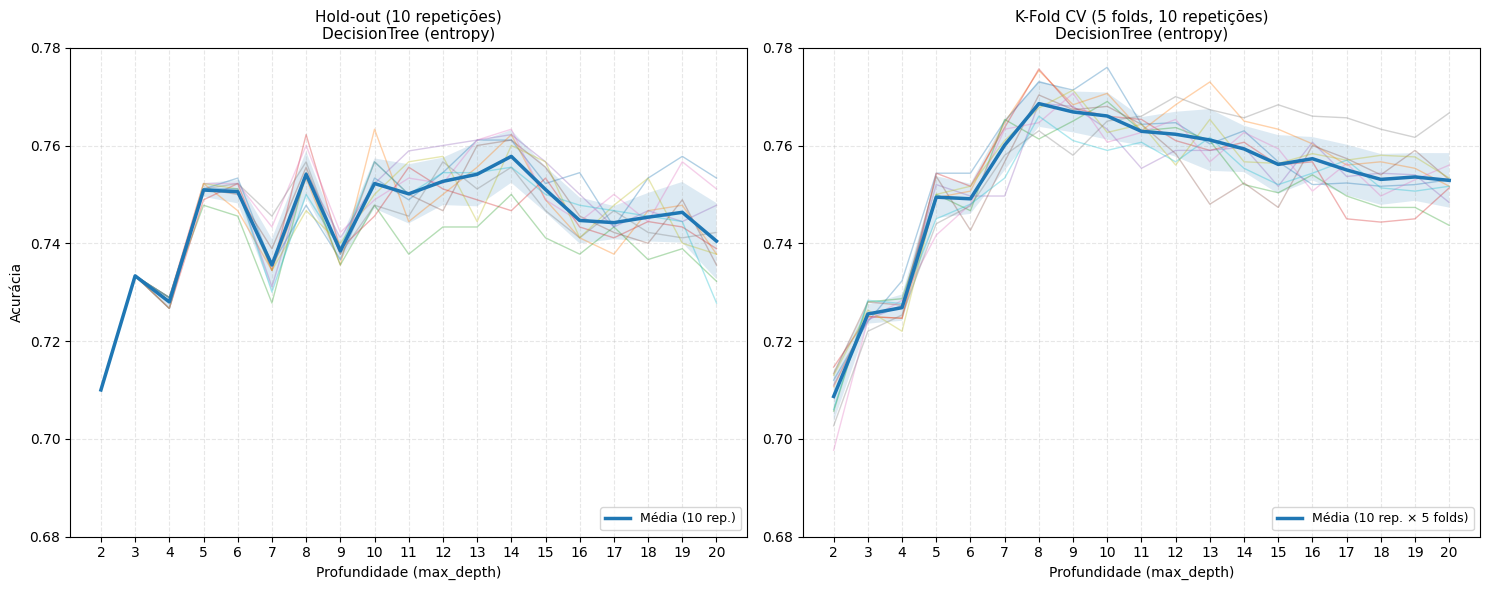

In [ ]:
depths = list(range(2, 21)) # profundidade de 2 a 20
n_runs = 10 # repetições
test_size = 0.30 # hold-out 70/30
rng = np.random.default_rng(2025) # PRNG para seeds

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)
plt.subplots_adjust(wspace=0.25) # espaço horizontal entre gráficos

all_runs_holdout = []

for run_idx in range(n_runs):
  seed = int(rng.integers(0, 10_000))
  X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size,
    stratify=y,
    random_state=seed
  )

  accs_this_run = []
  for d in depths:
    clf = DecisionTreeClassifier(
      criterion="entropy",
      max_depth=d,
      random_state=seed
    )

    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    accs_this_run.append(accuracy_score(y_te, y_pred))

  all_runs_holdout.append(accs_this_run)
  axes[0].plot(depths, accs_this_run, linewidth=1, alpha=0.35)

all_runs_holdout = np.array(all_runs_holdout)
mean_holdout = all_runs_holdout.mean(axis=0)
std_holdout = all_runs_holdout.std(axis=0)
axes[0].plot(depths, mean_holdout, linewidth=2.5, label="Média (10 rep.)")
axes[0].fill_between(depths, mean_holdout - std_holdout, mean_holdout + std_holdout, alpha=0.15)
axes[0].set_title("Hold-out (10 repetições)\nDecisionTree (entropy)", fontsize=11)
axes[0].set_xlabel("Profundidade (max_depth)")
axes[0].set_ylabel("Acurácia")
axes[0].set_xticks(depths)
axes[0].set_ylim(0.68, 0.78)
axes[0].grid(True, linestyle="--", alpha=0.3)
axes[0].legend(loc="lower right", fontsize=9)

all_runs_cv = []

for run_idx in range(n_runs):
      seed = int(rng.integers(0, 10_000))
      skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
      # ... (avaliar por profundidade via cross_val_score)
      from sklearn.model_selection import cross_val_score

      accs_this_run = []
      for d in depths:
        clf = DecisionTreeClassifier(
            criterion="entropy",
            max_depth=d,
            random_state=seed)
        scores = cross_val_score(clf, X, y, cv=skf, scoring="accuracy")
        accs_this_run.append(scores.mean())

      all_runs_cv.append(accs_this_run)
      axes[1].plot(depths, accs_this_run, linewidth=1, alpha=0.35)

all_runs_cv = np.array(all_runs_cv)
mean_cv = all_runs_cv.mean(axis=0)
std_cv = all_runs_cv.std(axis=0)

axes[1].plot(depths, mean_cv, linewidth=2.5, label="Média (10 rep. × 5 folds)")
axes[1].fill_between(depths, mean_cv - std_cv, mean_cv + std_cv, alpha=0.15)
axes[1].set_title("K-Fold CV (5 folds, 10 repetições)\nDecisionTree (entropy)", fontsize=11)
axes[1].set_xlabel("Profundidade (max_depth)")
axes[1].set_xticks(depths)
axes[1].set_ylim(0.68, 0.78)
axes[1].grid(True, linestyle="--", alpha=0.3)
axes[1].legend(loc="lower right", fontsize=9)

plt.tight_layout()
plt.show()
